# School of Hard Knocks

This notebook is a dive into Machine Learning and Data Science by using a fake school of test data. By carefully and deliberately generating a fake school's test results, we can insert patterns, irregularities and trends and test our analysis to make sure we pick it up.


In [40]:
# Required libraries and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [91]:
from random import shuffle

class Generator:
    """
    Handles the generation of students results for analysis.
    """
    
    def __init__(self, limit):

        self.students = self._get_students()
            
        self.limit = limit
    
    def trunc(self, value):
        if value < 0:
            return 0
        elif value > 100:
            return 100
        else:
            return value
        
    def _get_students(self):
        """Create the initail student list"""
        with open("names_male.txt", 'r') as f:
            males = [name.split(' ')[0] for name in f.readlines()] 
        with open("names_female.txt", 'r') as f:
            females = [name.split(' ')[0] for name in f.readlines()]
        
        scores = [self.trunc(100 * random.normalvariate(0.6, 0.25))
                  for x in range(0, 100)]

        students = [{'Name': name,
                    'Gender': 'Male',
                    'Score': scores[k]} for k, name in enumerate(males)]

        students += [{'Name': female,
                     'Gender': 'Female',
                     'Score': scores[k]} for k, female in enumerate(females)]
        
        shuffle(students)
        return students
        
    def get_names(self):
        return pd.Series([stu['Name'] for stu in self.students[0: self.limit]])
    
    def get_scores(self):
        return pd.Series([stu['Score'] for stu in self.students[0: self.limit]])

    def get_genders(self):
        return pd.Series([stu['Gender'] for stu in self.students[0: self.limit]])
    
gen = Generator(100)
results = pd.DataFrame({"Name": gen.get_names(),
                        "Score": gen.get_scores(),
                        "Gender": gen.get_genders()})
results[:10]


,Gender,Name,Score
0,Female,Stefani,3.516528
1,Female,Natashia,44.975355
2,Male,Darron,67.894325
3,Female,Sherell,59.818939
4,Male,Gregorio,17.315306
5,Female,Shaunna,31.193879
6,Male,Randell,50.655490
7,Female,Page,50.655490
8,Male,Malcolm,73.001907
9,Male,Bradly,56.563338


(array([  4.,   6.,   4.,   8.,  14.,  14.,  18.,  16.,  10.,   6.]),
 array([   0.34887161,   10.31398445,   20.27909729,   30.24421013,
          40.20932297,   50.1744358 ,   60.13954864,   70.10466148,
          80.06977432,   90.03488716,  100.        ]),
 <a list of 10 Patch objects>)

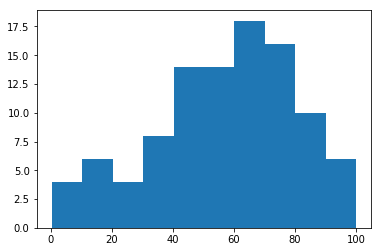

In [92]:
fig, ax = plt.subplots()
ax.hist(results['Score'])


In [89]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']

In [90]:
cities['City name'].apply(lambda c: c.startswith('San')) & cities['Area square miles'].apply(lambda c: c > 50)

0    False
1     True
2    False
dtype: bool

In [57]:
cities.reindex(np.random.permutation(cities.index))
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
2,San Jose,1015785,176.53,5754.177760
1,Sacramento,485199,97.92,4955.055147
